In [1]:
import porespy as ps
import numpy as np
import matplotlib.pyplot as plt

from src import record


np.random.seed(0)

d:\programming\python\2_advance\chem_structure\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


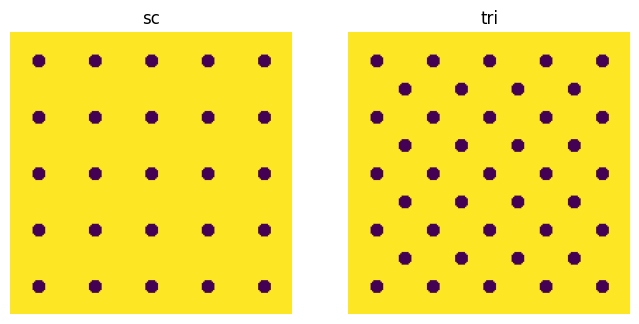

In [2]:
Nxy = 200
n_sphere = 5
r = 5
spacing = int(Nxy / n_sphere)
offset = int(spacing / 2)

lattices = ["sc", "tri"]

fig, ax = plt.subplots(1, 2, figsize=[8, 4])
for i, lattice in enumerate(lattices):
    im = ps.generators.lattice_spheres(
        shape=[Nxy, Nxy],
        r=r,
        spacing=spacing,
        lattice=lattice,
        offset=[offset, offset],
    )
    ax[i].imshow(im)
    ax[i].axis(False)
    ax[i].set_title(lattice)

plt.show()

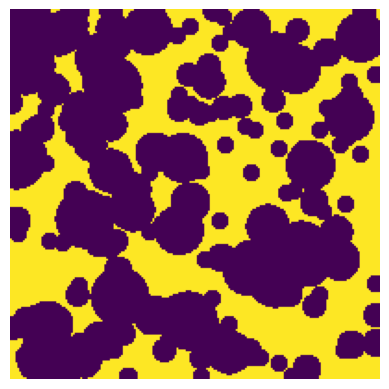

In [3]:
from scipy import stats


dist = stats.norm(loc=10, scale=4)
porosity = 0.4

sphere_im = ps.generators.polydisperse_spheres(
    shape=[Nxy, Nxy],
    porosity=porosity,
    dist=dist
)

plt.imshow(sphere_im)
plt.axis(False)
plt.show()

C:\Users\atsu9\AppData\Local\Temp\ipykernel_12200\3958919193.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


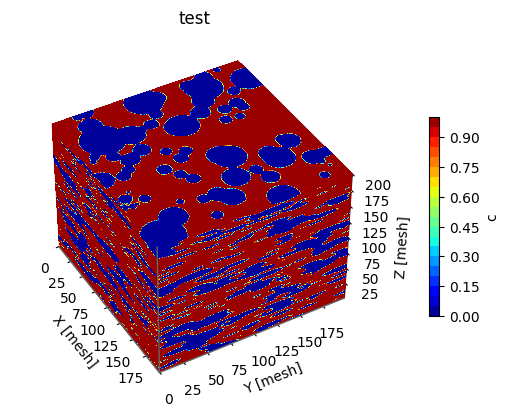

In [40]:
import cv2


dist = stats.norm(loc=15, scale=5)
porosity = 0.3

Nxy, Nz = 200, 200
ratio = 4
affin = np.array([[1 / ratio, 0, 0], [0, 1, 0]], dtype=np.float32)

sphere_3D_im = ps.generators.polydisperse_spheres(
    shape=[Nxy, Nxy, Nz * ratio],
    porosity=porosity,
    nbins=5,
    dist=dist
)


affined_im = np.zeros(
    [sphere_3D_im.shape[0], sphere_3D_im.shape[1], int(Nz)]
).astype(np.uint8)
for y in range(Nxy):
    p = cv2.warpAffine(
        sphere_3D_im[y, :, :].astype(np.uint8),
        affin,
        (Nz, Nxy),
        flags=cv2.INTER_LINEAR
    )
    affined_im[y, :, :] = p

fig = record.fig_3d(affined_im, "test")
fig.show()